In [1]:
import torch as th
from matplotlib import animation
import numpy as np
import seaborn as sns
import data as data_lib
import evaluation
import re_eval
import os 
import matplotlib.pyplot as plt

In [3]:
models = re_eval.load_all_important_models('./model')
models = {k: v for k, v in models.items() if '2d' in k and 'mammal' in k}

NotADirectoryError: [Errno 20] Not a directory: './model/idf.pkl'

In [2]:
model = re_eval.ModelInfo('./model/mammals.normal.2d_imb.lr=2.0.dim=2.negs=50.burnin=10.batch=10')
name = 'mammal2d'

In [3]:
maxn = model.log.get_eval_result().epoch.max()

In [4]:
from collections import Counter
def filter_idx(_idx):
    count = Counter()
    for i, j, _ in _idx:
        count[i] += 1
        count[j] += 1
        
    ret = []
    head = Counter()
    tail = Counter()
    N = 20
    for i, j, _ in _idx:
        if count[i] < N or count[j] < N:
            continue
        if head[i]:
            continue
        ret.append((i, j, _))
        head[i] += 1
        tail[j] += 1
    return ret


In [22]:
from collections import defaultdict

def get_depths(idx):
    adj_down = defaultdict(lambda: set())
    adj_up = defaultdict(lambda: set())
    max_index = 0
    for h, t, _ in idx:
        adj_down[t].add(h)
        adj_up[t]
        adj_up[h].add(t)
        if max_index < h:
            max_index = h
        if max_index < t:
            max_index = t
            
    # find root
    depth = {}
    max_depth = 0
    for i, vs in adj_up.items():
        if len(vs) == 0:
            depth[i] = 0
    print("root size: ", len(depth))
    assert len(depth) > 0
            
    while max_depth < 8:
        new_depth = {}
        for k, d in depth.items():
            for v in adj_down[k]:
                if v not in depth:
                    new_depth[v] = d + 1
            if max_depth < d + 1:
                max_depth = d + 1
        if len(new_depth) == 0:
            break
        depth.update(new_depth)
    ans = [-1] * (max_index + 1)
    for k, d in depth.items():
        ans[k] = d
#     new_idx = []
#     for h, t, _ in idx:
#         if depth[h] != -1 and depth[t] != -1:
    return ans


out = [400, 50, 5]
def map_size(depth):
    if depth < len(out):
        return out[depth]
    return 5
    
    
def plot(_model, epoch, data_path, plot_words=True, filter_seg=True, plot_binary=False, em_root=False):
    fin = os.path.join(_model.path_to_dir, '%d.nth' % (epoch, ))
    with open(fin, 'rb') as f:
        data = th.load(f)
    
    emb = data['model']['lt.weight']
    objs = data['objects']
    idx, _, _ = data_lib.slurp(data_path, objects=objs)
    if filter_seg:
        idx = filter_idx(idx)
    emb = emb[:node_num].numpy()
    objs = objs[:node_num]
    if plot_binary:
        temp = emb[0].copy()
        emb[0] = emb[1]
        emb[1] = temp
        idx[1][1] = 0
        idx[2][1] = 1
        idx[3][1] = 1
        idx = idx[:30]
        emb = th.from_numpy(emb)
        s = [800, 400, 400] + [200] * 4 + [100]*8 + [50]*16 + [10] * node_num
    elif em_root:
        depths = get_depths(idx)
        s = list(map(map_size, depths))
        idx = []
    else:
        s = 5
        
    import random
    fig, ax = plt.subplots(figsize=(8, 8))
    plt.axis('off')
    ax.scatter(emb[:, 0], 
               emb[:, 1],
               alpha=0.3,
               s=s)
    already_there = []
    segs = []
    for h, t, _ in idx:
        if filter_seg and (h >= node_num or t >= node_num):
            continue
            
        rh = np.sqrt(np.sum(emb[h]**2))
        rt = np.sqrt(np.sum(emb[t]**2))
        di = np.sqrt(np.sum((emb[t] - emb[h])**2))
        segs.append((emb[h].tolist(), emb[t].tolist()))
    
    if plot_words:
        for i in range(len(objs)):
            r = np.sqrt(np.sum(emb[i]**2))
            if epoch != maxn or r > 0.9:
                if random.random() > np.exp(-3 * r):
                    continue

                too_close = False
                for i, node in enumerate(already_there):
                    dis = np.sqrt(np.sum((emb[i] - node)**2))
                    if dis < 0.3:
                        too_close = True
                        break

                if too_close:
                    continue

            already_there.append(emb[i])
            ax.annotate(objs[i], xy=(emb[i][0], emb[i][1]),  xycoords='data',
                    xytext=(emb[i][0], emb[i][1]), textcoords='offset points',
                    bbox=dict(boxstyle="round4,pad=.5", fc="0.9"),)

    ln_coll = matplotlib.collections.LineCollection(segs, linewidths=0.5)
    ax.add_collection(ln_coll)
    ax.set_xlim(-1, 1)    
    ax.set_ylim(-1, 1)
    plt.draw()
    return fig
    



root size:  11

root size:  11

root size:  11


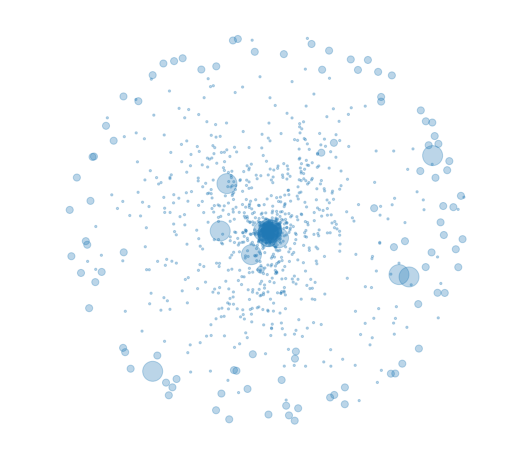

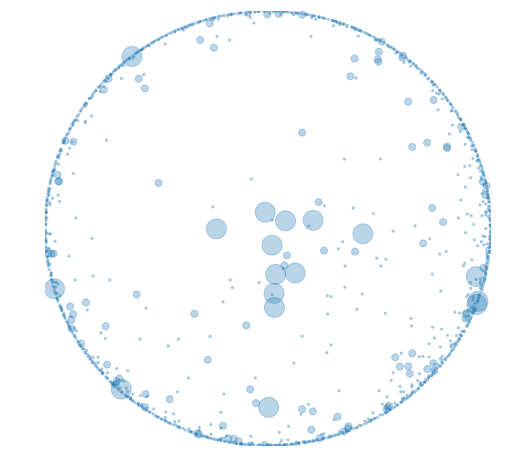

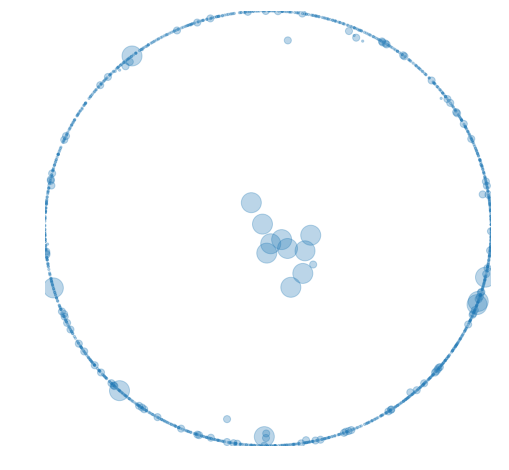

In [23]:

import matplotlib
node_num = 300000

for epoch in (9, 19, maxn):
    plot(model, epoch, './wordnet/mammal_closure.tsv', False, True, em_root=True)


root size:  11

root size:  11

root size:  11

root size:  11

root size:  11

root size:  11

root size:  11

root size:  11

root size:  11

root size:  11

root size:  11

root size:  11

root size:  11

root size:  11

root size:  11

root size:  11

root size:  11

root size:  11

root size:  11

root size:  11

root size:  11



/home/chen/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


root size:  11

root size:  11

root size:  11

root size:  11

root size:  11

root size:  11

root size:  11

root size:  11

root size:  11

root size:  11

root size:  11

root size:  11

root size:  11

root size:  11

root size:  11

root size:  11

root size:  11

root size:  11

root size:  11

root size:  11

root size:  11

root size:  11

root size:  11

root size:  11


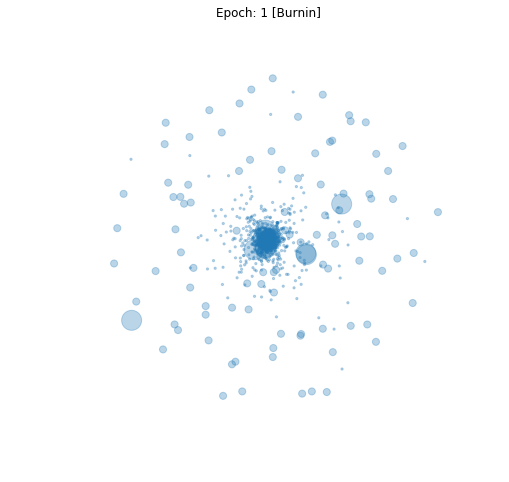

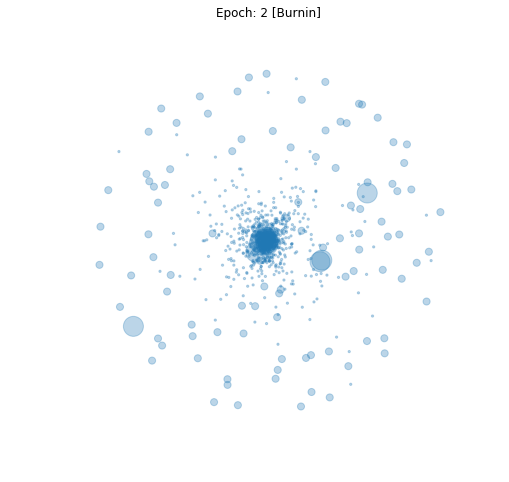

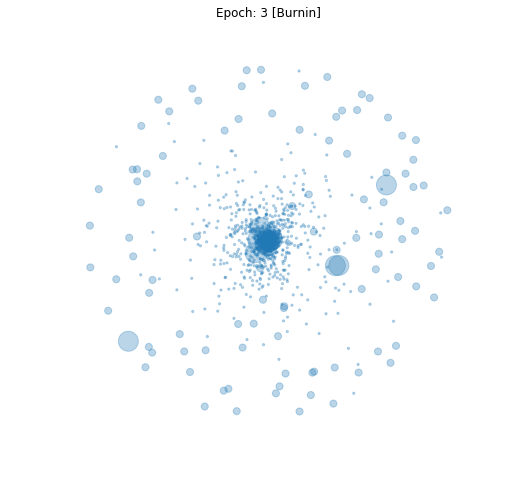

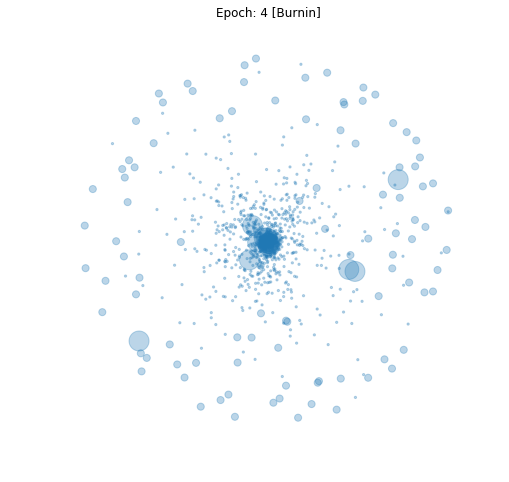

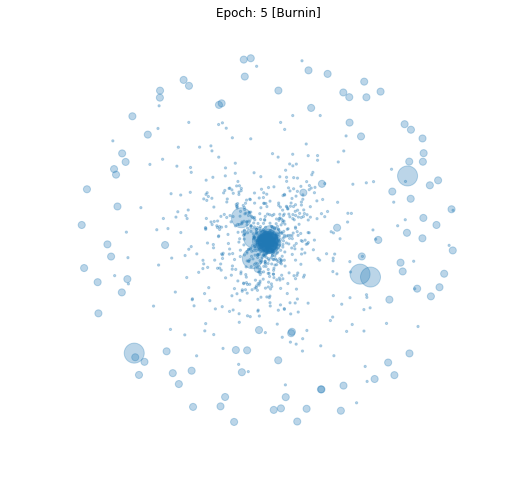

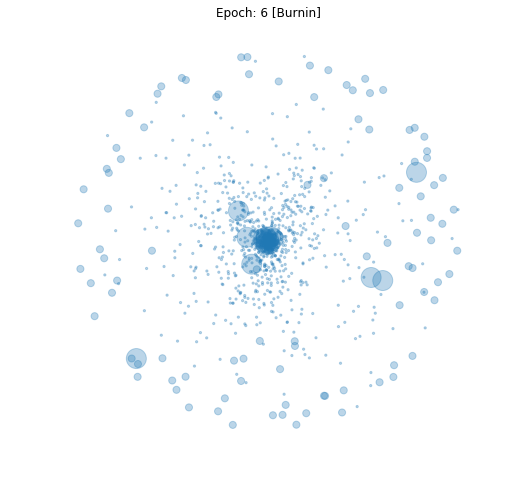

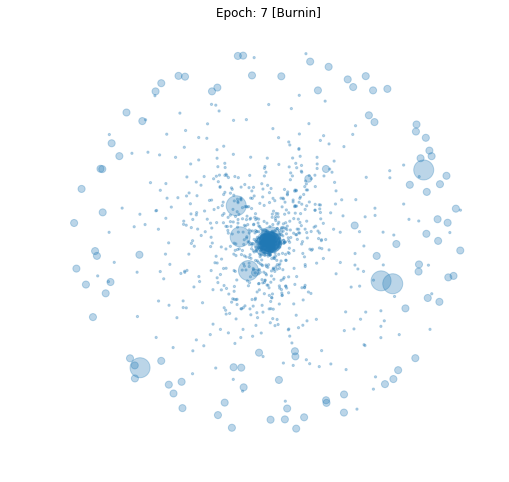

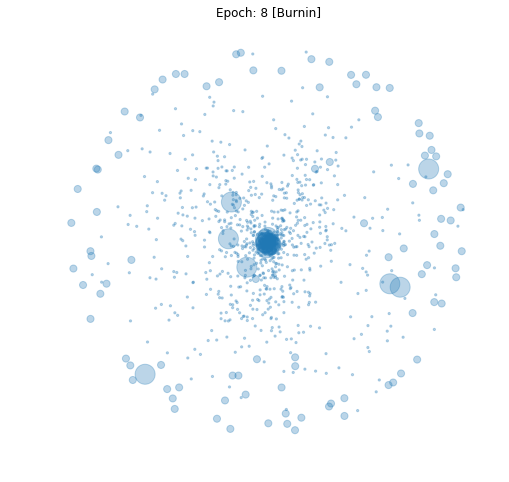

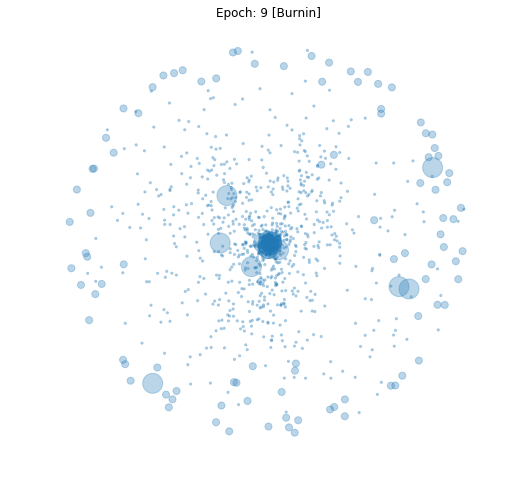

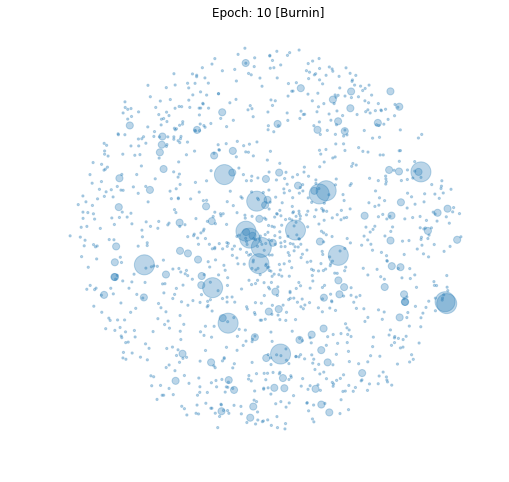

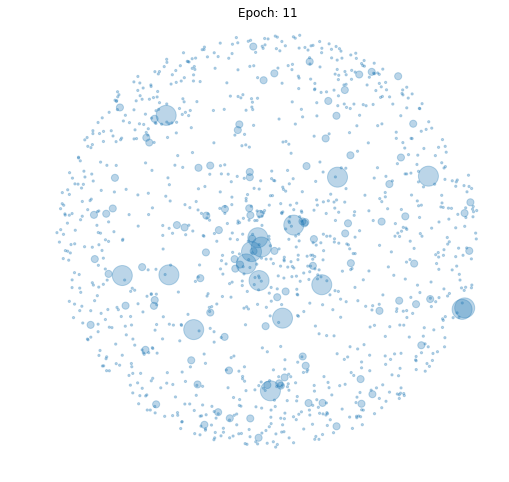

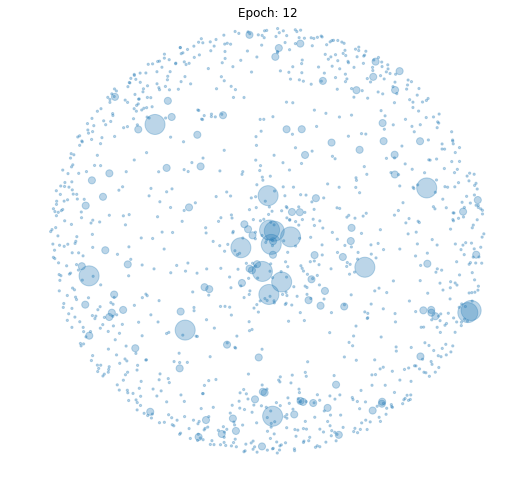

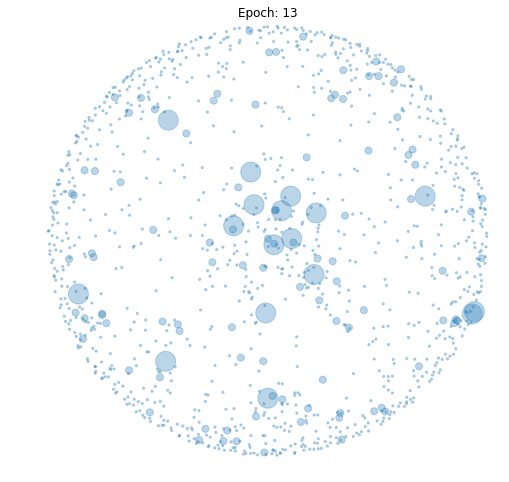

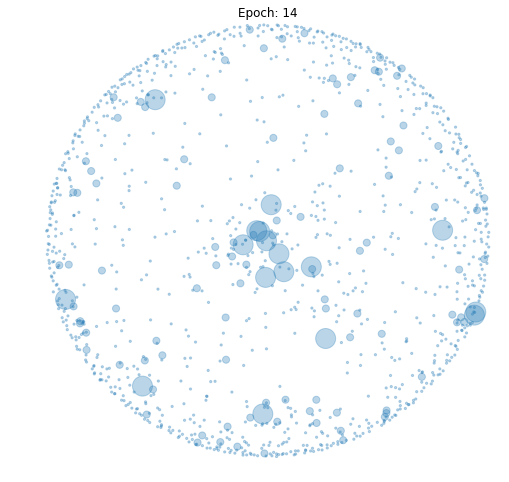

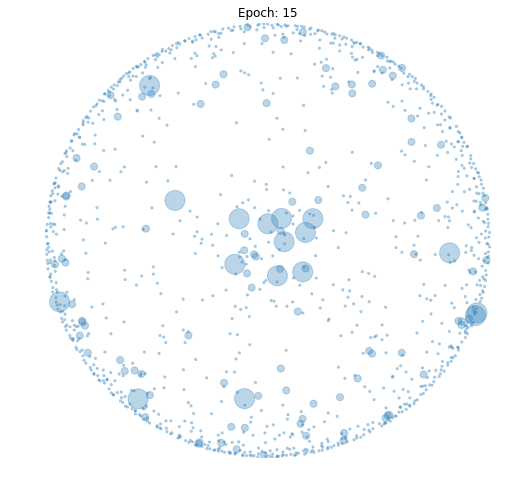

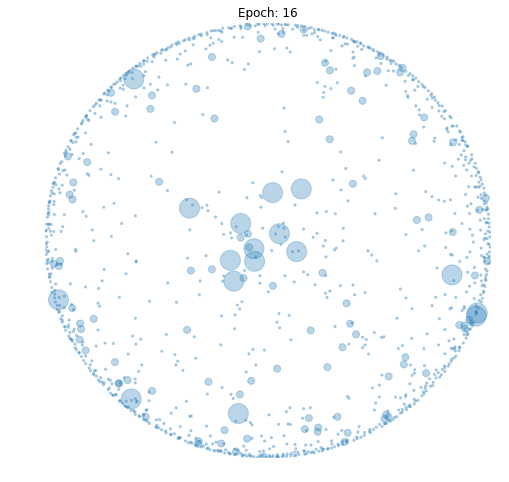

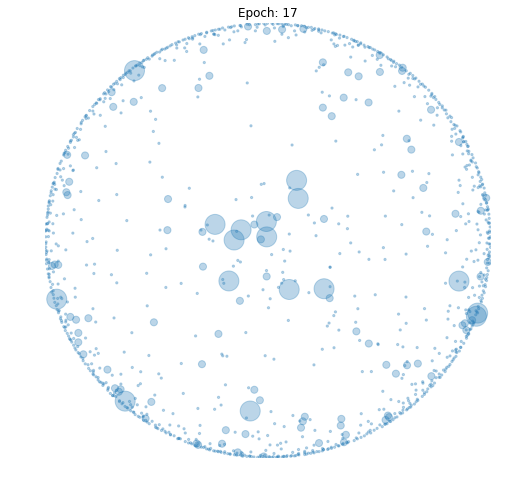

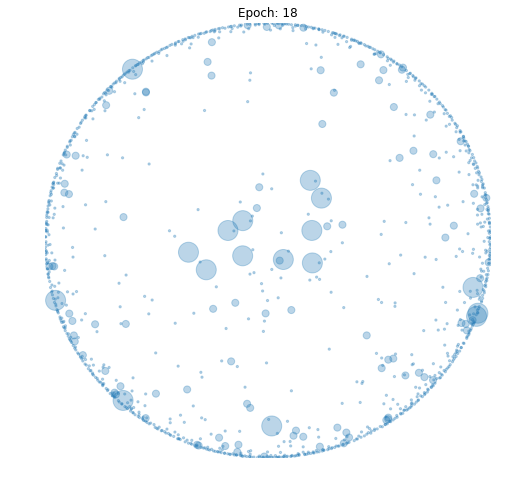

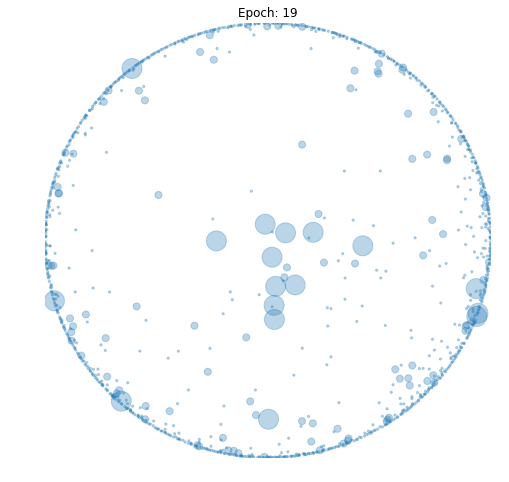

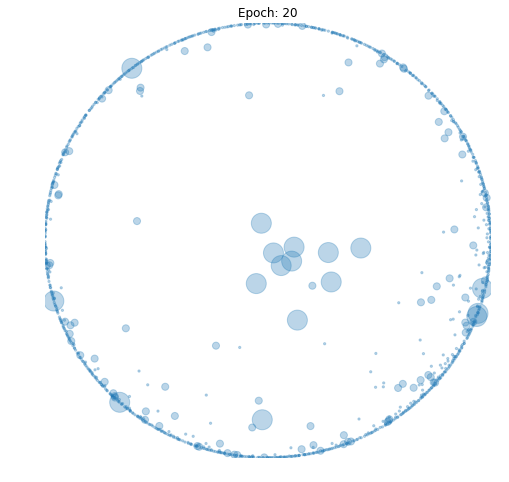

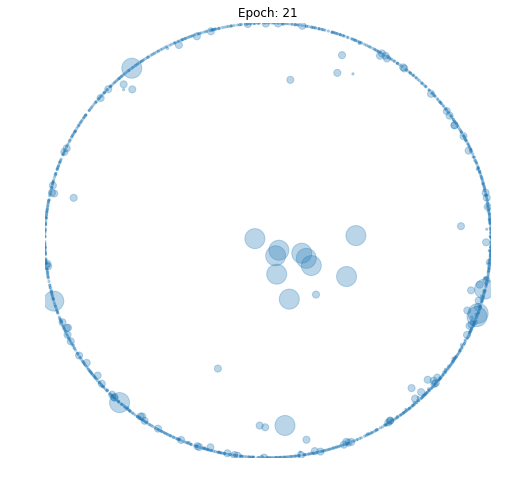

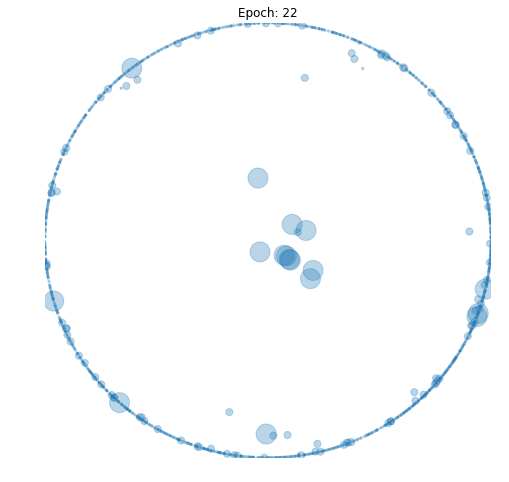

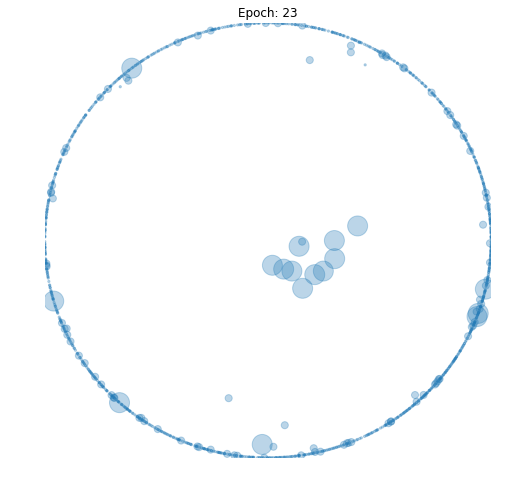

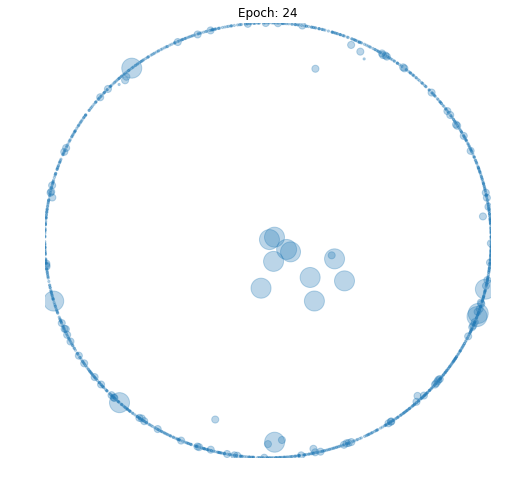

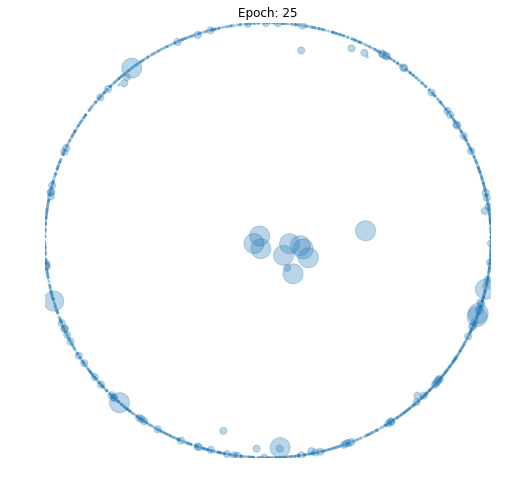

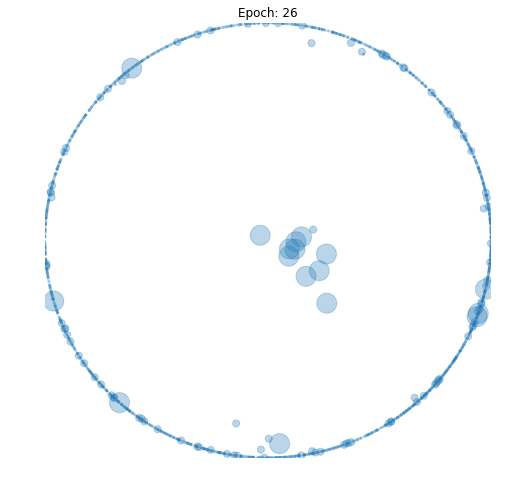

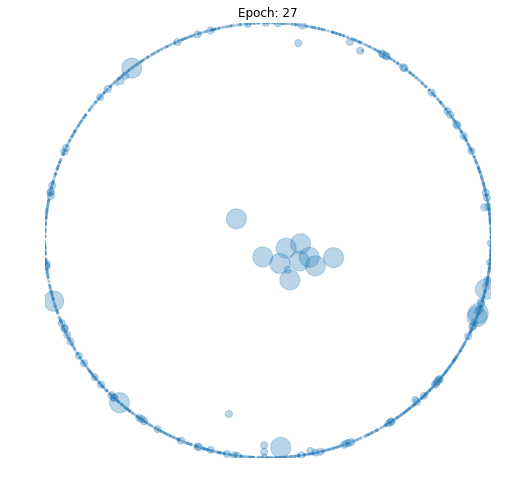

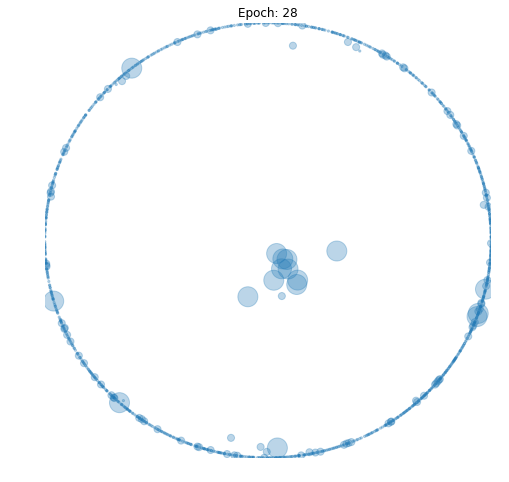

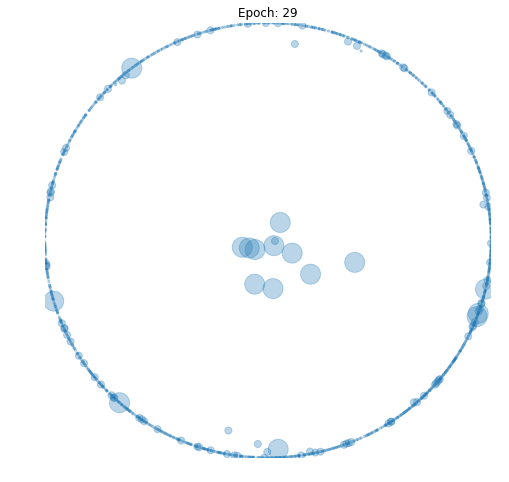

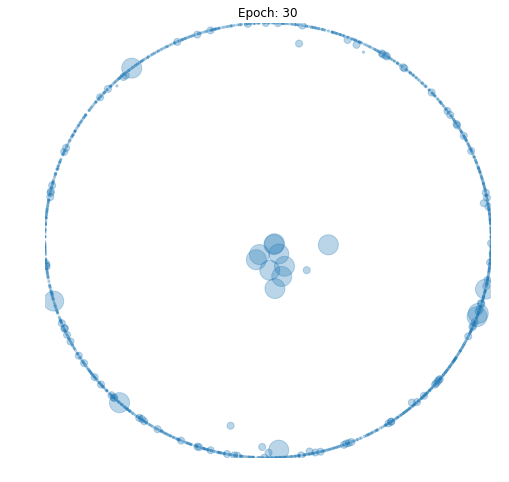

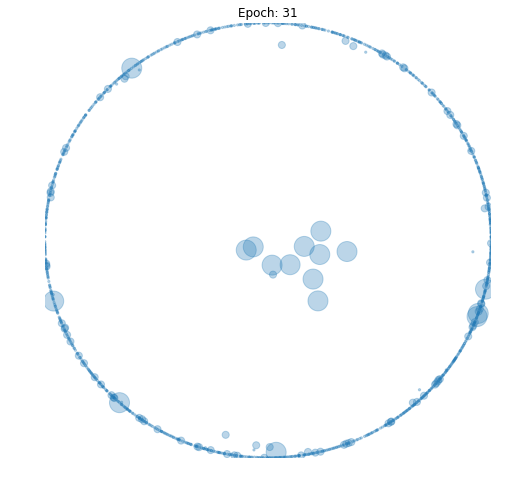

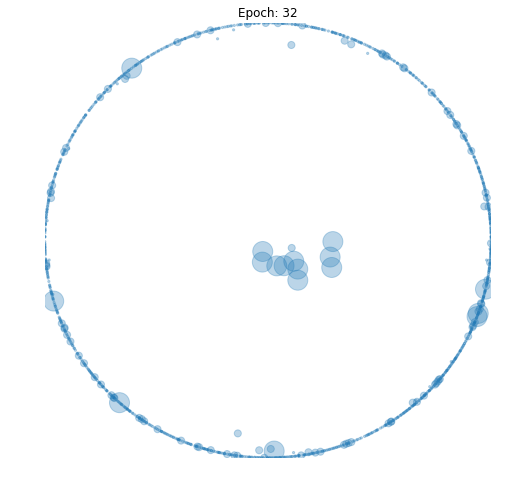

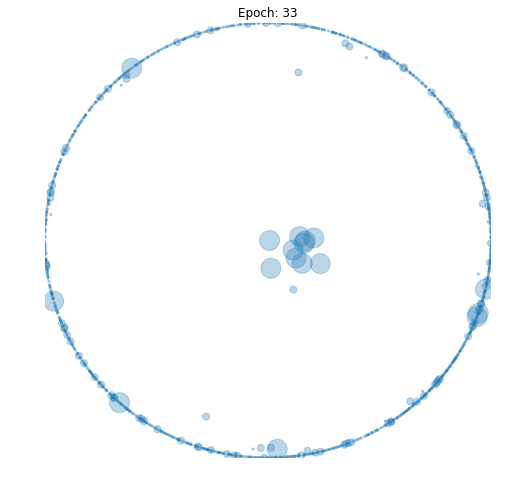

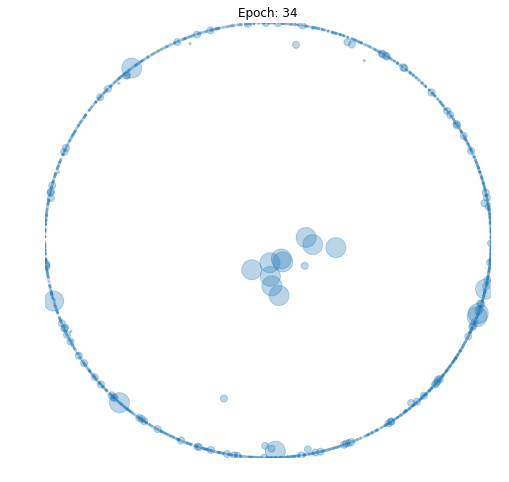

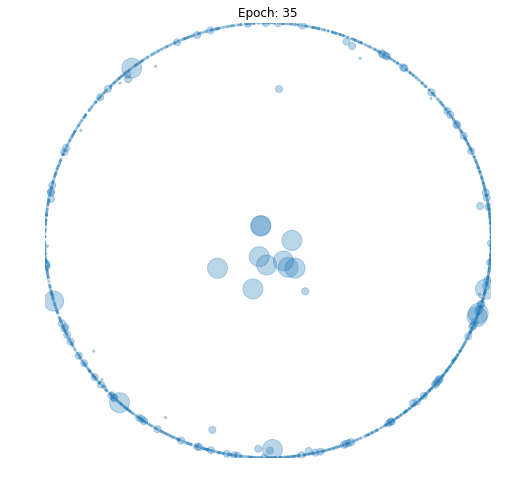

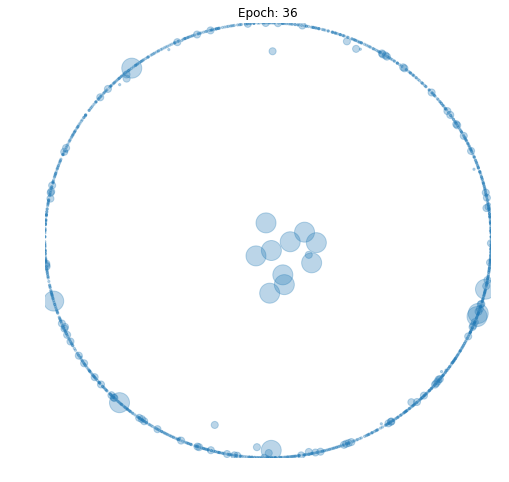

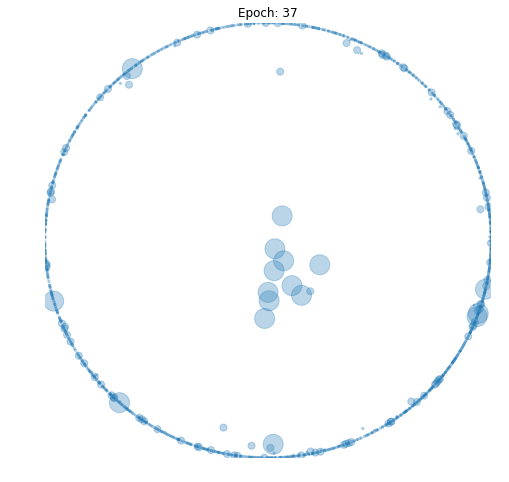

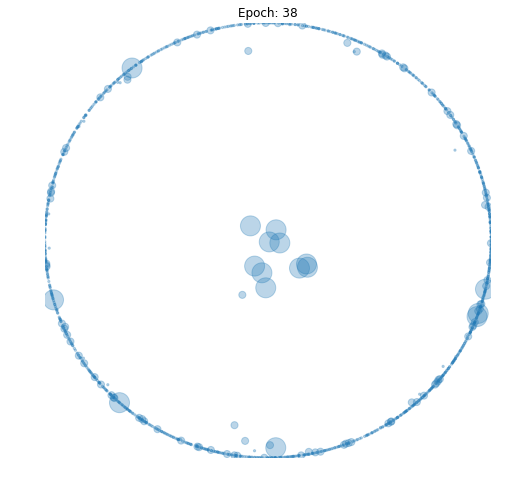

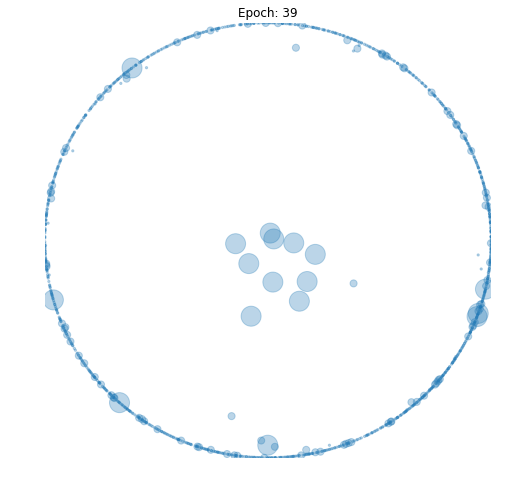

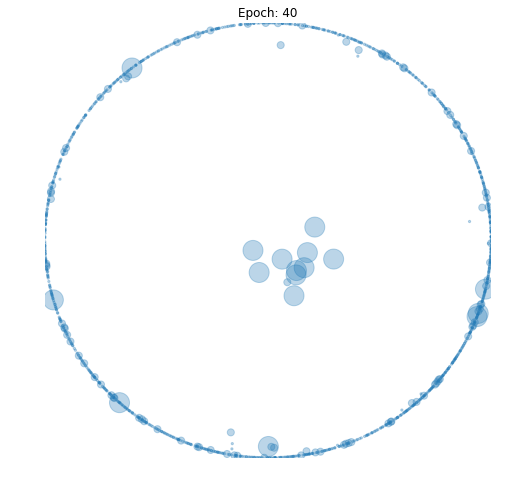

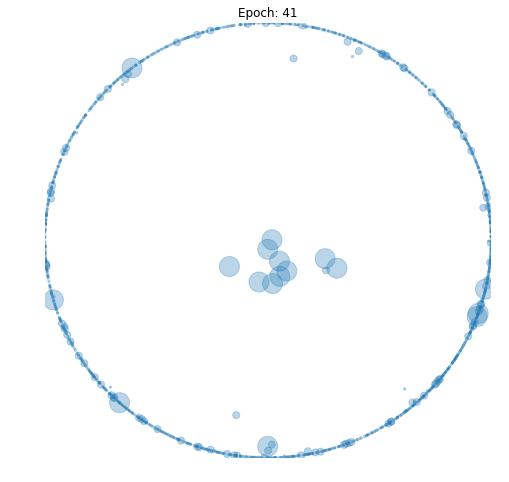

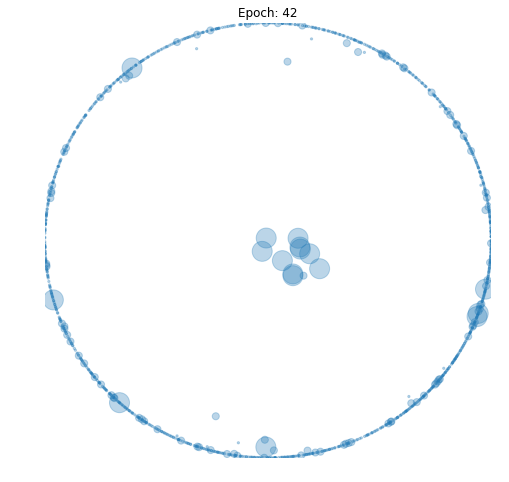

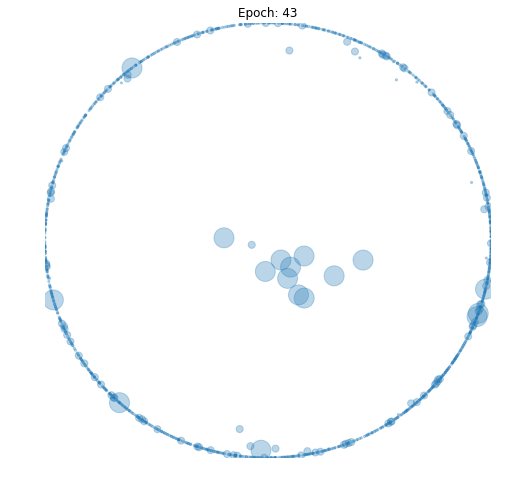

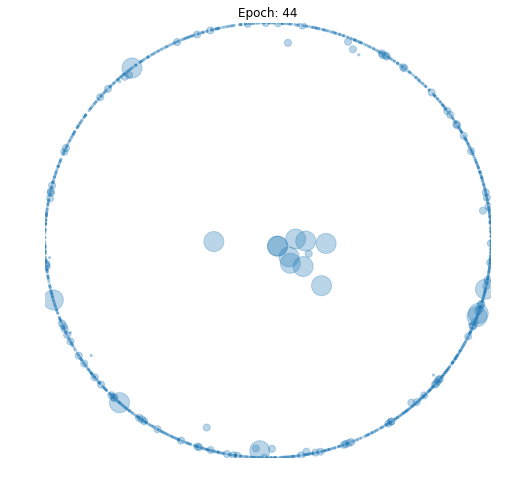

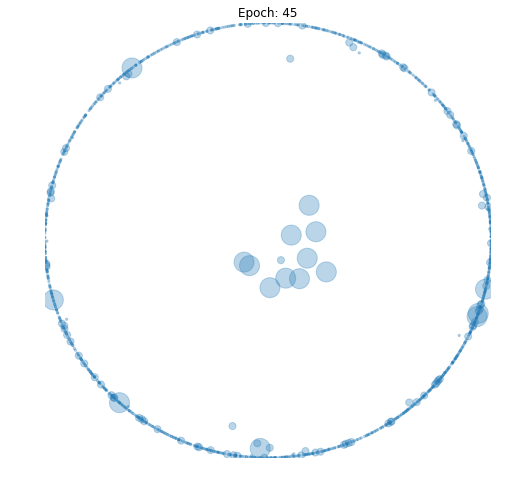

In [8]:
for epoch in range(1, maxn, 1):
    fig = plot(model, epoch, './wordnet/mammal_closure.tsv', False, True, em_root=True)
    plt.title(f'Epoch: {epoch}' + ('' if epoch >= 11 else ' [Burnin]'))
    fig.savefig(f'./anim_mammals//{epoch}.png')

In [9]:
import os
import imageio
images = []
root = './anim_mammals/'
paths = []
for file in os.listdir(root):
    path = os.path.join(root, file)
    try:
        paths.append((path, int(file.split('.')[0])))
    except:
        pass
paths.sort(key=lambda x: x[1])
for path, i in paths:
    images.append(imageio.imread(path))
imageio.mimsave(root + 'movie.gif', images, duration=0.2)